# Basic Time Series Forecasting Techniques



## Intro


Forecasting is a wide domain with numerous applications in almost every industry. Due to this, the range of forecasting models is also very large with each model having its own pros and cons.

In this article, I want to go over some basic and simple forecasting models. Despite their simplicity, these models can offer good results in practice and provide a good basis to iterate from.

## Average Forecast


The first model we will consider is the average forecast. This model simply assumes that all future values are equal to the mean of all the previous observations:

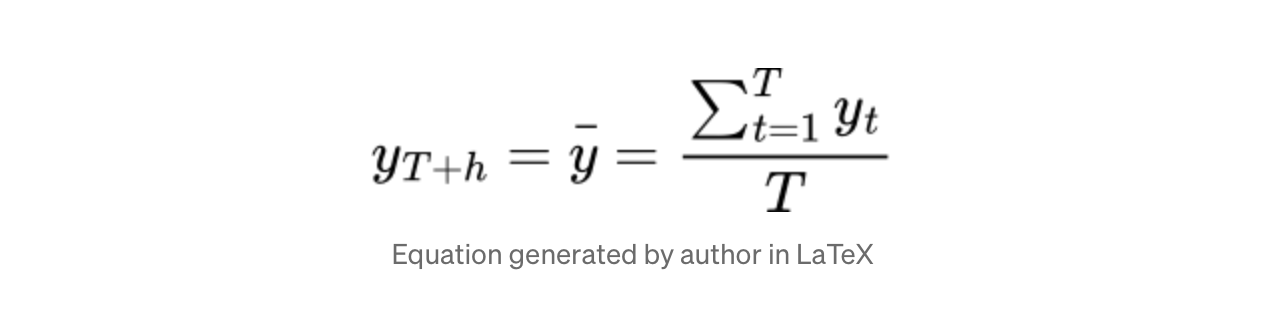

Where h is the future time-step we are forecasting for, T is the length of the time series, y_t is an observed value at time t and y_bar is the mean of the observed values. For this model we must have some past data available to compute the forecast.


In [39]:
# Import packages
import plotly.graph_objects as go
import pandas as pd

# Read in the data
data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])

# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]


def plot_func(forecast, title):
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Month'], y=data['#Passengers'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Month'], y=forecast, name='Test'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passenger Volume')

    return fig.show()

In [25]:
test.head()

,Month,#Passengers
116,1958-09-01,404
117,1958-10-01,359
118,1958-11-01,310
119,1958-12-01,337
120,1959-01-01,360


In [ ]:
# Average forecast
test['mean_forecast'] = train['#Passengers'].mean()
plot_func(test['mean_forecast'], 'Average Forecast')

## Naive Forecasting


The second model, naive forecasting, is setting the future forecast equal to the latest observed value:

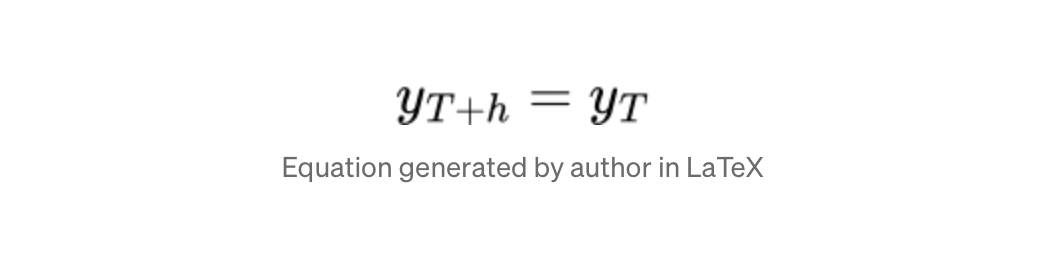

This model is considered the benchmark for any forecast and is often used to model stock market and financial data due to its erratic nature. The naive model can also be called random-walk-without-drift model.

In [ ]:
# Naive forecast
test['naive_forecast'] = train['#Passengers'].iloc[-1]
plot_func(test['naive_forecast'], 'Naive Forecast')

In [ ]:
# Adding predicted column on test dataset
test['naive_forecast_corrected'] = test['#Passengers'].shift(1)

The above code considers future predictions equal to previous month in train dataset, which is setting not just Sep 1958 to Aug 1958, but all forcasted values to Aug 1958. It should be similar to lag 1 model, where forcasted value is equal to previous month actual. Using shift(1) to create 'naive_forecast_corrected', and ploting the actual data instead of training data for clearer comparison.

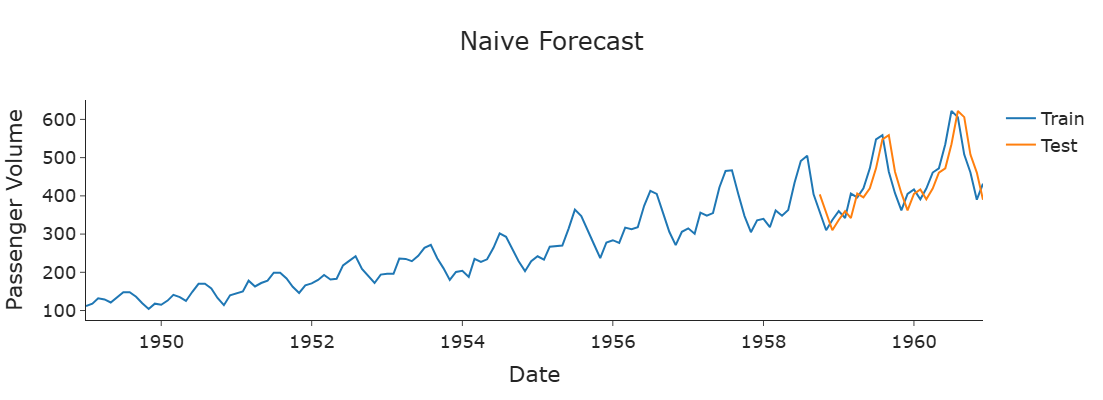

In [49]:
plot_func(test['naive_forecast_corrected'], 'Naive Forecast')

## Seasonal Naive Forecasting

The third method is an extension of the naive method, but this time the forecast is equal to the most recent observed value in the same season. Hence, it is know as the seasonal naive model. For example, the forecast for the next quarter one is equal to the previous years quarter one value. This model is useful when we have a clear and large seasonal variation in our time series.

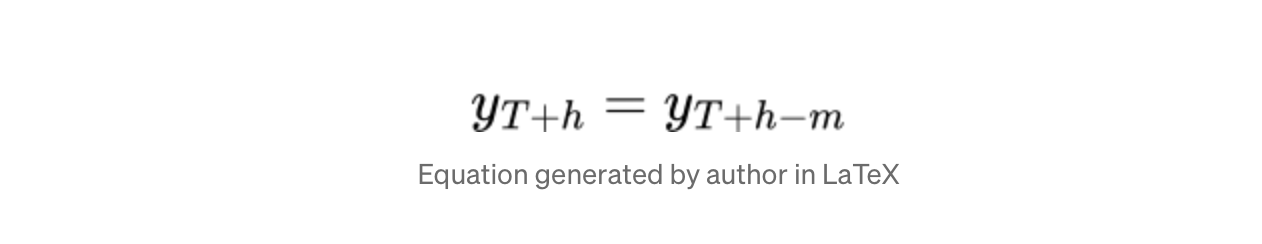

Where m is the seasonality of the data. So, for monthly data with a yearly seasonality m=12, quarterly data would have m=4 and weekly data would have m=52.

/var/folders/lv/t3hqq91524b1nlzy1_jp_z8c0000gn/T/ipykernel_2634/294302301.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/lv/t3hqq91524b1nlzy1_jp_z8c0000gn/T/ipykernel_2634/294302301.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



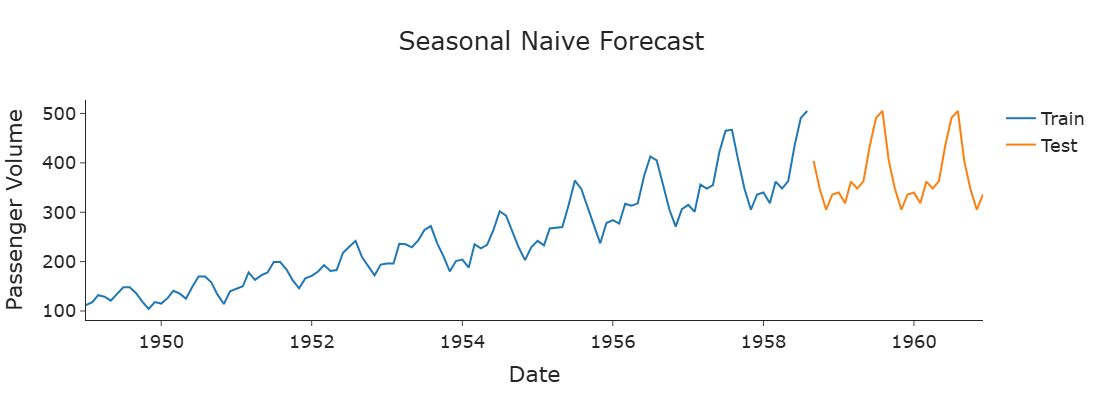

In [6]:
# Seasonal naive forecast
train['month_number'] = pd.DatetimeIndex(train['Month']).month
test['month_number'] = pd.DatetimeIndex(test['Month']).month

snaive_fc = []
for row_idx, row in test.iterrows():
    month = row['month_number']
    forecast = train['#Passengers'] .loc[train['month_number'] == month].iloc[-1]
    snaive_fc.append(forecast)

plot_func(snaive_fc, 'Seasonal Naive Forecast')

As our model has quite an obvious and large seasonality component, the seasonal naive model is performing pretty well. However, it hasn’t full captured the trend of data as we expect the passenger volumes to increase overtime.

## Drift Model


The final model we will consider is the drift model. This is also an extension of the naive forecast where we let the prediction either linearly increase or decrease through time as a function of time step, h, scaled by the average historical trend:

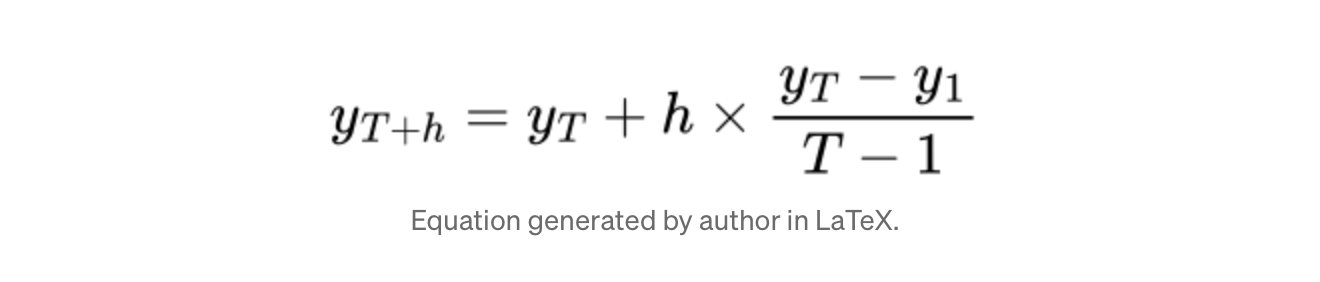

This is basically just drawing a straight line from the first to last point and extending it forwards through time. However, this is where the issue lies as the model will always either increase or decease through time which is often not the case in real life scenarios.

In [ ]:
# Drift forecast
constant = (train['#Passengers'].iloc[-1] - train['#Passengers'].iloc[0])/(len(train)-1)
test['h'] = range(len(test))
test['drift_forecast'] = train['#Passengers'].iloc[-1] + test['h']*constant

plot_func(test['drift_forecast'], 'Drift Forecast')